# Task 2.3: Classification with LSTM

In [82]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(104)

## Specify parameters

### Manually set config

In [83]:
kwargs = {
    # Main mode
    "mode": "classification",  # prediction or classification

    # Model config
    "model": "LSTM",  # LSTM or RNN
    # "hidden_dim": 32,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 1400,
    "lr": 0.01,
    "batch_size": 128
}

config = Config(**kwargs)

In [84]:
# Save config
# config.save("default_pred_lstm")

### Load saved config

In [85]:
config = load_train_config("config_default_class_lstm")
print(config)

Config loaded from: config/config_default_class_lstm.json
CONFIG:
  mode: classification
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: LSTM
  input_dim: 96
  hidden_dim: 128
  output_dim: 10
  num_layers: 1
  dropout: 0.0
  epochs: 400
  lr: 0.03
  batch_size: 128
  eval_steps: 50


## Run FL training

In [86]:
x, y, splits = get_data(config)
x_train, x_val, x_test, y_train, y_val, y_test = splits

In [87]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 2.3052, val loss: 2.2914, val acc: 0.1575
  Epoch: 50,  train loss: 1.1537, val loss: 0.8331, val acc: 0.6799
  Epoch: 100,  train loss: 1.0555, val loss: 0.7783, val acc: 0.6974
  Epoch: 150,  train loss: 1.1138, val loss: 0.7522, val acc: 0.7082
  Epoch: 200,  train loss: 1.0575, val loss: 0.7540, val acc: 0.7083
  Epoch: 250,  train loss: 1.0929, val loss: 0.7496, val acc: 0.7114
  Epoch: 300,  train loss: 1.2734, val loss: 0.7607, val acc: 0.7137
  Epoch: 350,  train loss: 1.1059, val loss: 0.7377, val acc: 0.7184
  Epoch: 400,  train loss: 1.0064, val loss: 0.7386, val acc: 0.7214
  Needed 1.64 minutes for training


### Analysis

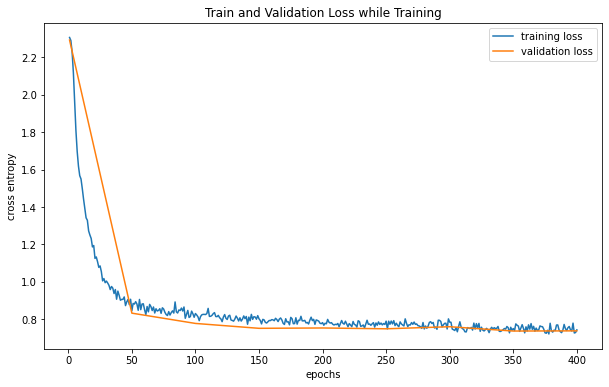

In [88]:
fl.plot_training_loss()

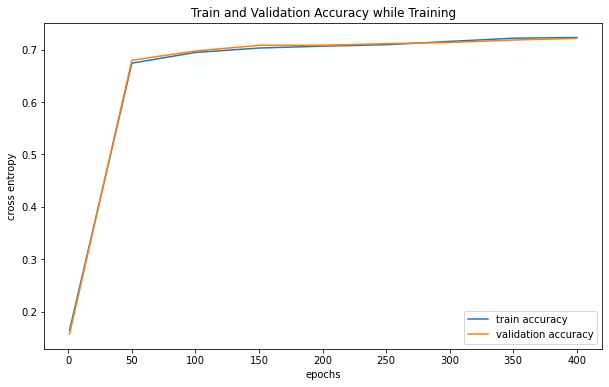

In [89]:
fl.plot_training_accuracy()

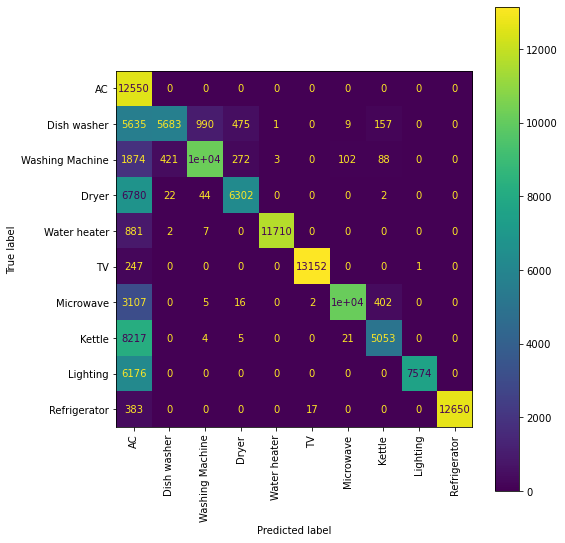

In [90]:
# Train set confusion matrix
fl.plot_confusion_matrix(x_train, y_train)

In [91]:
fl.evaluation_metrics(x_test, y_test)

METRICS:
  Test cross entropy: 0.8433
                 precision    recall  f1-score   support

             AC       0.34      1.00      0.51      4650
    Dish washer       0.78      0.38      0.51      3700
Washing Machine       0.83      0.72      0.77      3600
          Dryer       0.89      0.46      0.61      3650
   Water heater       1.00      0.93      0.96      3750
             TV       0.99      0.99      0.99      3250
      Microwave       0.98      0.74      0.84      3500
         Kettle       0.85      0.38      0.52      3550
       Lighting       1.00      0.55      0.71      3300
   Refrigerator       1.00      0.93      0.96      3550

       accuracy                           0.71     36500
      macro avg       0.87      0.71      0.74     36500
   weighted avg       0.85      0.71      0.73     36500



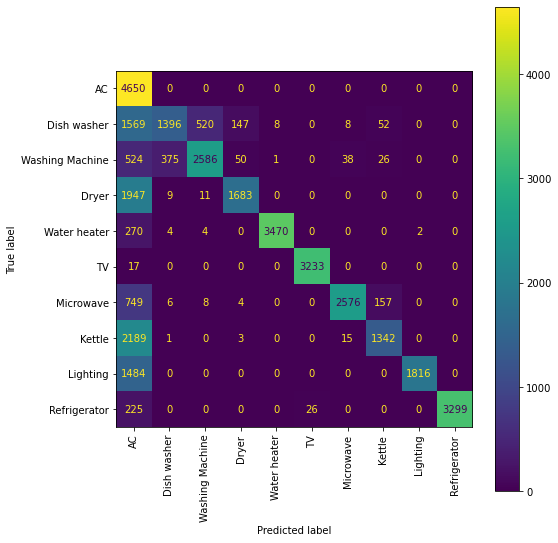

In [92]:
# Test set confusion matrix
fl.plot_confusion_matrix(x_test, y_test)

## Run training with aggregated data

In [93]:
x, y, splits = get_data(config)
x_train, x_val, x_test, y_train, y_val, y_test = splits

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [94]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 2.3110, val loss: 2.3054, val acc: 0.1100
  Epoch: 50,  train loss: 0.9851, val loss: 1.2017, val acc: 0.5670
  Epoch: 100,  train loss: 1.1296, val loss: 1.0265, val acc: 0.6117
  Epoch: 150,  train loss: 1.0577, val loss: 0.9656, val acc: 0.6087
  Epoch: 200,  train loss: 1.0521, val loss: 0.9317, val acc: 0.6440
  Epoch: 250,  train loss: 1.1053, val loss: 0.8826, val acc: 0.6605
  Epoch: 300,  train loss: 1.1382, val loss: 0.8713, val acc: 0.6597
  Epoch: 350,  train loss: 0.9448, val loss: 0.8698, val acc: 0.6579
  Epoch: 400,  train loss: 0.8793, val loss: 0.8451, val acc: 0.6690
  Needed 0.12 minutes for training


### Analysis

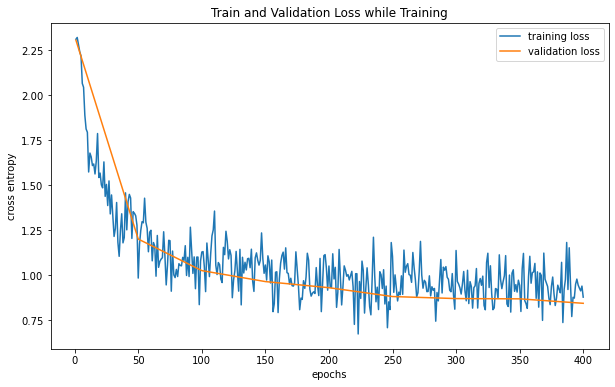

In [95]:
fl_agg.plot_training_loss()

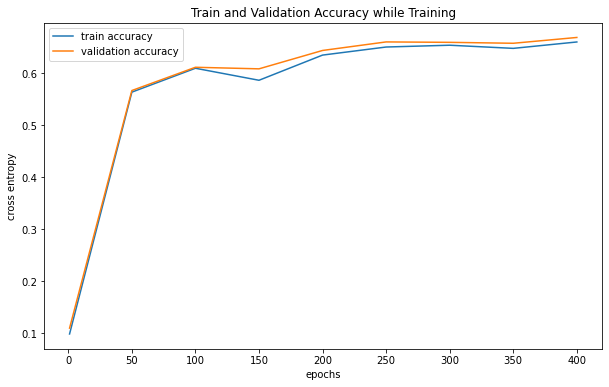

In [96]:
fl_agg.plot_training_accuracy()

In [97]:
fl_agg.evaluation_metrics(x_test, y_test)

METRICS:
  Test cross entropy: 0.9458
                 precision    recall  f1-score   support

             AC       0.34      1.00      0.51      4650
    Dish washer       0.63      0.15      0.24      3700
Washing Machine       0.66      0.67      0.66      3600
          Dryer       0.70      0.42      0.53      3650
   Water heater       0.98      0.89      0.93      3750
             TV       0.97      0.99      0.98      3250
      Microwave       0.87      0.61      0.72      3500
         Kettle       0.68      0.36      0.47      3550
       Lighting       0.99      0.54      0.70      3300
   Refrigerator       1.00      0.92      0.96      3550

       accuracy                           0.66     36500
      macro avg       0.78      0.65      0.67     36500
   weighted avg       0.76      0.66      0.66     36500



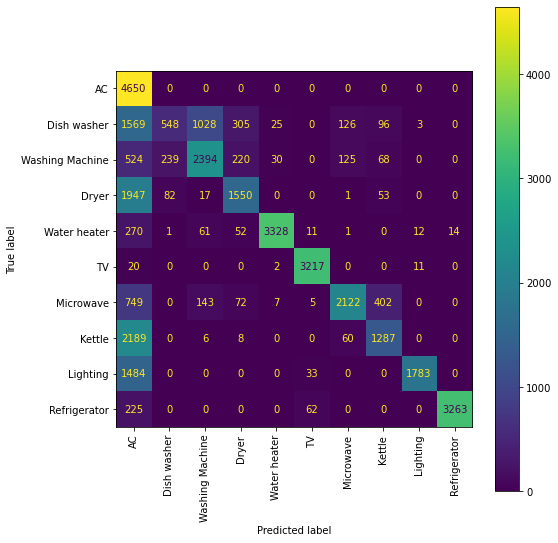

In [98]:
fl_agg.plot_confusion_matrix(x_test, y_test)